In [1]:
#匯入套件
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt

### 資料合併整理

In [3]:
# 讀入 csv 文字檔
csv_file = "text_cloudschool0102.csv"   #刪掉"005_xdf_cut_pop.csv"(1986540, 3) 英文和數字....保留文字、ID、學校、版、留言數
input_cut= pd.read_csv(csv_file) 
input_cut= input_cut[['id', 'Text']]
print("input_cut.shape", input_cut.shape)
#input_cut.to_csv("005_xdf_cut_popclean.csv", encoding = "utf_8_sig")


csv_file = "002artical_0901_1115school.csv"
input_artical = pd.read_csv(csv_file) 
input_artical = input_artical.drop(input_artical.columns[0] , axis=1)
print("input_artical.shape", input_artical.shape)


#合併斷詞
df_cut= pd.merge(input_artical, input_cut, how='inner')
print("df_cut.shape", df_cut.shape)
df_cut.head()

input_cut.shape (998412, 2)
input_artical.shape (77555, 10)
df_cut.shape (999184, 11)


,id,content,createdAt,commentCount,forumName,forumAlias,school,gender,school_revised,ISschool,Text
0,231979746.0,請問工科的學生，學校有教Solid works繪圖軟體的課嗎（或者製圖的也可以）,2019-09-01 00:05:50.442,9.0,崑山科大,ksu,崑山科技大學,F,崑山科大,True,請問
1,231979746.0,請問工科的學生，學校有教Solid works繪圖軟體的課嗎（或者製圖的也可以）,2019-09-01 00:05:50.442,9.0,崑山科大,ksu,崑山科技大學,F,崑山科大,True,學生
2,231979746.0,請問工科的學生，學校有教Solid works繪圖軟體的課嗎（或者製圖的也可以）,2019-09-01 00:05:50.442,9.0,崑山科大,ksu,崑山科技大學,F,崑山科大,True,學校
3,231979746.0,請問工科的學生，學校有教Solid works繪圖軟體的課嗎（或者製圖的也可以）,2019-09-01 00:05:50.442,9.0,崑山科大,ksu,崑山科技大學,F,崑山科大,True,有教
4,231979746.0,請問工科的學生，學校有教Solid works繪圖軟體的課嗎（或者製圖的也可以）,2019-09-01 00:05:50.442,9.0,崑山科大,ksu,崑山科技大學,F,崑山科大,True,繪圖


In [4]:
# view the specific data line
#textword = df_cut[df_cut['commentCount'] == df_cut[['commentCount']].max()[0]]
textword = df_cut[df_cut['Text'] == '傳統']
textword 

,id,content,createdAt,commentCount,forumName,forumAlias,school,gender,school_revised,ISschool,Text
10927,231986503.0,咱們休閒事業管理系\n可以說是團康活動很厲害\n教授也很厲害的系（只要妳/你肯巴著學\n但沒...,2019-09-01 19:48:43.052,103.0,南臺科大,stust,南臺科技大學,F,南臺科大,True,傳統
34638,231998468.0,想問問系上學長姐一下我們電機系上系學會有沒有辦迎新活動呀?\n剛剛看了學校電機系學會網站，雖...,2019-09-03 13:02:44.126,5.0,華夏科大,hwh,華夏科技大學,M,華夏科大,True,傳統
39867,232001403.0,社團總有許多好與壞，喜歡玩社團的人，因為對於某些事物感到興趣，而聚集於此。又會因為各種事情，...,2019-09-03 21:16:20.394,14.0,彰化師範大學,ncue,國立彰化師範大學,M,彰化師範大學,True,傳統
44686,232003808.0,安安，不好意思身為邊緣人想問一個問題，\n\n\n今天路過一家傳統超市看到了好多種煙火，\n...,2019-09-04 08:09:32.538,10.0,長庚大學,cgu,長庚大學,F,長庚大學,True,傳統
46178,232004523.0,http://i.imgur.com/pvaxcW3.jpg\n\n【中華大學／新竹市訊】暑...,2019-09-04 10:10:05.054,0.0,中華大學,chu,chu_editor,M,其他,True,傳統
62304,232011929.0,逢甲電機 傳統不變\n三電一工 檔修無限\n每年每屆 經典重現\n二一修學 明年再見\n\n...,2019-09-05 10:55:16.393,57.0,逢甲大學,fcu,逢甲大學,M,逢甲大學,True,傳統
85902,232023004.0,你各位新生啊\n開學前一天的晚上\n要記得去水塔拜碼頭啊\n多年傳統不能遺忘,2019-09-06 18:11:21.151,11.0,國立雲林科技大學,yuntech,國立雲林科技大學,M,國立雲林科技大學,True,傳統
91005,232025872.0,小妹菜逼八 最近發現很多系宿營都是男生多的系還有女生多的系一起合辦的（！！\n想知道找別的系...,2019-09-07 07:43:46.463,13.0,臺灣大學,ntu,國立臺灣大學,F,臺灣大學,True,傳統
103275,232032422.0,"昨天大概凌晨3,4點，南華九村4樓傳來一聲部隊起床，我趕緊起床結果外面沒人，這是什麼傳統嗎？",2019-09-08 05:21:40.739,6.0,南華大學,nhu,南華大學,M,南華大學,True,傳統
105532,232033474.0,請問農園系有在認直屬的嗎？\n還是沒有這個傳統,2019-09-08 08:35:23.065,12.0,屏科大,npust,國立屏東科技大學,M,屏科大,True,傳統


In [4]:
# 再次排除 stopwords
#設定停用詞 
#stopwords = set(STOPWORDS) #英文
#stopwords.add("int") #加字詞
with open(r'005 dict_stop_words.txt', 'r', encoding='utf8') as f:  
    stops = f.read().split('\n') 
stops=["因為", "沒有", "有沒有", "我們", "這樣", "還是", "怎麼", "什麼", "覺得", "感覺", "時候", "然後", "請問", "玩歸", 
       "想問", "謝謝", "如題", "剛剛", "啊啊", "感謝", "嗚嗚", "好了", "一點", "些人", "現在", "會害"] + stops
#stops = {}.fromkeys(stops)   #其他格式範例 stopwords = {}.fromkeys(["沒有","一個","什麼","那個"])
stops

#Select stopwords
df_cut[['Text']] = df_cut[['Text']].fillna('…')
for i in range(len(stops)):
    df_cut.loc[df_cut['Text'] == stops[i], 'stopsText'] = True
df_cut[['stopsText']] = df_cut[['stopsText']].fillna(False)

df_cutClean = df_cut[df_cut['stopsText'] == False]
print("df_cutClean shape: ", df_cutClean.shape)

df_cutClean shape:  (709315, 12)


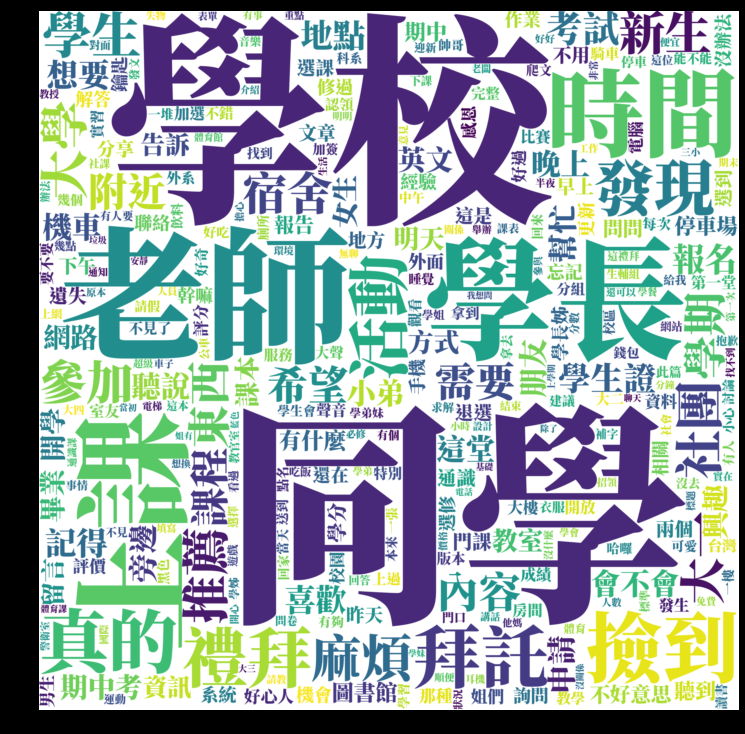

In [29]:
# 以 "詞頻" 作雲字的大小
from collections import Counter

df_wcdata = df_cutClean
my_wordcloud = WordCloud(font_path="NotoSerifCJKtc-Black.otf", #設置字體
                         background_color="white", #背景顏色,預設為黑色
                         max_words = 300, #文字雲顯示最大詞數
                         #mask=mask,
                         #stopwords=stops,
                         collocations=False, 
                         width=2400, 
                         height=2400, 
                         margin=2   #設定圖片的邊緣
                         )  

#dic = dict(zip(df_wcdata['Text'], df_wcdata['commentCount']))#词频以字典形式存储
#my_wordcloud.generate_from_frequencies(frequencies=dic)
my_wordcloud.generate_from_frequencies(frequencies=Counter(df_wcdata['Text']))

#產生圖片
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(my_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#顯示用
plt.show()

##### 整理['Text'] 重覆出現再多篇文章的問題

In [5]:
df_cutNOdup = df_cutClean
df_cutNOdup.sort_values(by=['Text', 'commentCount'], inplace=True, ascending=[True, False])
df_cutNOdup = df_cutNOdup.reset_index(drop=True)
# keep first duplicate row
df_cutNOdup = df_cutNOdup.drop_duplicates('Text', 'first', inplace=False)  
# subset : column label or sequence of labels, optional : 用来指定特定的列，默认所有列
# keep : {‘first’, ‘last’, False}, default ‘first’ 删除重复项并保留第一次出现的项 
# inplace : boolean, default False  是直接在原来数据上修改还是保留一个副本
print("df_cutNOdup shape: ", df_cutNOdup.shape)

df_cutNOdup shape:  (71119, 12)


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


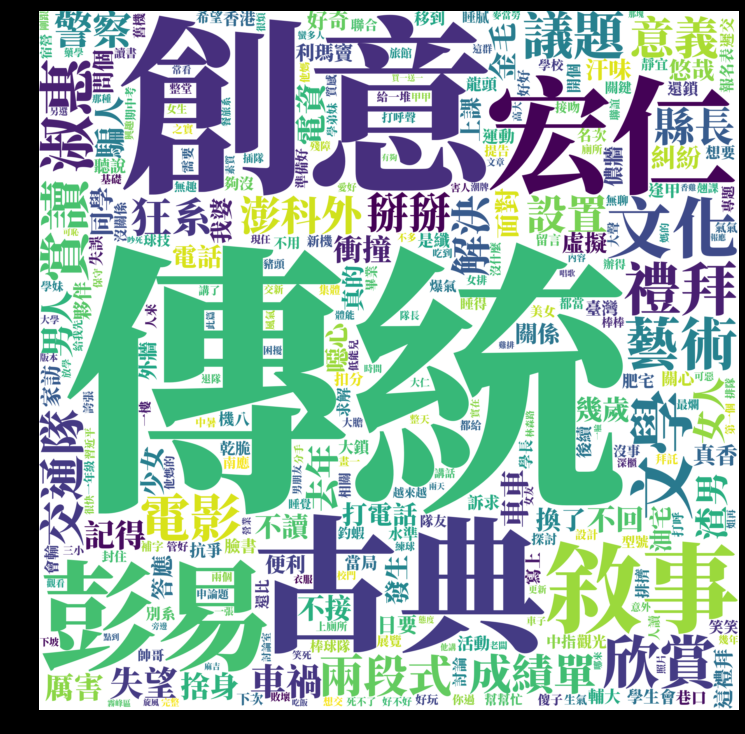

In [6]:
#整理['Text'] 重覆出現再多篇文章的問題 + 文字雲 commentCount 原始設定
df_wcdata = df_cutNOdup
my_wordcloud = WordCloud(font_path="NotoSerifCJKtc-Black.otf", #設置字體
                         background_color="white", #背景顏色,預設為黑色
                         max_words = 300, #文字雲顯示最大詞數
                         #mask=mask,
                         #stopwords=stops,
                         collocations=False, 
                         width=2400, 
                         height=2400, 
                         margin=2   #設定圖片的邊緣
                         )  

dic = dict(zip(df_wcdata['Text'], df_wcdata['commentCount']))#词频以字典形式存储
my_wordcloud.generate_from_frequencies(frequencies=dic)

#產生圖片
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(my_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#顯示用
plt.show()

## 雲-- 分性 校園版群

In [15]:
forumName_counts = input_artical['forumName'].value_counts()
forumName_counts.index[0]

'文化大學'

In [28]:
#forumAlias ISschool
for i in range(len(forumName_counts)):
    df_cutNOdup = df_cutClean[df_cutClean['forumName']==forumName_counts.index[i]]
    df_cutNOdup.sort_values(by=['Text', 'commentCount'], inplace=True, ascending=[True, False])
    df_cutNOdup = df_cutNOdup.reset_index(drop=True)
    # keep first duplicate row
    df_cutNOdup = df_cutNOdup.drop_duplicates('Text', 'first', inplace=False) 
    # subset : column label or sequence of labels, optional : 用来指定特定的列，默认所有列
    # keep : {‘first’, ‘last’, False}, default ‘first’ 删除重复项并保留第一次出现的项 
    # inplace : boolean, default False  是直接在原来数据上修改还是保留一个副本
    print(str(i) + forumName_counts.index[i] + "shape: ", df_cutNOdup.shape)

    df_wcdata = df_cutNOdup
    my_wordcloud = WordCloud(font_path="NotoSerifCJKtc-Black.otf", #設置字體
                             background_color="white", #背景顏色,預設為黑色
                             max_words = 300, #文字雲顯示最大詞數
                             #mask=mask,
                             #stopwords=stops,
                             collocations=False, 
                             width=2400, 
                             height=2400, 
                             margin=2   #設定圖片的邊緣
                             )  

    dic = dict(zip(df_wcdata['Text'], df_wcdata['commentCount']))#词频以字典形式存储
    my_wordcloud.generate_from_frequencies(frequencies=dic)

    #產生圖片
    #plt.figure( figsize=(20,10), facecolor='k')
    #plt.imshow(my_wordcloud,interpolation='bilinear')
    #plt.axis("off")
    #plt.tight_layout(pad=0)
    #顯示用
    #plt_cloud = plt.show()"
    my_wordcloud.to_file("cloud_school/" + str(i) + forumName_counts.index[i] + ".png")

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0文化大學shape:  (7928, 12)
1政治大學shape:  (8129, 12)
2輔仁大學shape:  (7804, 12)
3淡江大學shape:  (7329, 12)
4成功大學shape:  (7991, 12)
5逢甲大學shape:  (6724, 12)
6東海大學shape:  (6375, 12)
7中原大學shape:  (5895, 12)
8朝陽科大shape:  (5570, 12)
9銘傳大學shape:  (5332, 12)
10嘉南藥理大學shape:  (5208, 12)
11南臺科大shape:  (5176, 12)
12東華大學shape:  (5686, 12)
13長榮大學shape:  (5187, 12)
14屏科大shape:  (5214, 12)
15靜宜大學shape:  (5043, 12)
16屏東大學shape:  (4788, 12)
17中正大學shape:  (5238, 12)
18台南應用科大shape:  (4367, 12)
19高雄餐旅大學shape:  (4183, 12)
20弘光科技大學shape:  (4143, 12)
21亞洲大學shape:  (4469, 12)
22義守大學shape:  (4265, 12)
23臺灣大學shape:  (4792, 12)
24世新大學shape:  (4084, 12)
25中科大shape:  (3942, 12)
26輔英科技大學shape:  (3232, 12)
27文藻外語大學shape:  (3753, 12)
28臺灣警察專科學校shape:  (3732, 12)
29東吳大學shape:  (4006, 12)
30中華醫事科技大學shape:  (3298, 12)
31中興大學shape:  (3935, 12)
32元智大學shape:  (3511, 12)
33明新科技大學shape:  (2536, 12)
34龍華科技大學shape:  (2984, 12)
35嘉義大學shape:  (3373, 12)
36虎尾科大shape:  (3377, 12)
37中央大學shape:  (4288, 12)
38臺北大學shape:  (3431, 12)
39嶺東科大shape: 

ZeroDivisionError: float division by zero